# 1. Import package

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('fivethirtyeight')
sns.set(style = 'whitegrid',context = 'notebook')

# generate classification report using predictions for categorical model
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn import (metrics,  linear_model, preprocessing)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, learning_curve, StratifiedKFold

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 175)

# 2. Import data

In [2]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [3]:
original_df = df.copy()

In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# 3. Preprocessing data

In [7]:
df = df.fillna(df.mean())
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
num_vars = [var for var in df.columns if df[var].dtypes != 'O']
numdf = df[num_vars].drop(['Outcome'],axis=1)

from sklearn.preprocessing import MinMaxScaler
numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(numdf))
numdf_norm.columns = numdf.columns

In [9]:
X = numdf_norm
print (X.shape)
y = df['Outcome']
print (y.shape)

(768, 8)
(768,)


# 4. Predictive Model

## 4.1. Spliting data into training and test set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)
X_train.shape, X_test.shape

((614, 8), (154, 8))

## 4.2. Train logistic regression using statsmodel

In [15]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train_const)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.475222
         Iterations 6


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.2650
Time:                        06:19:50   Log-Likelihood:                -291.79
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 4.154e-41
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -5.6483      0.602     -9.375      0.000      -6.829      -4.467
Pregnancies                  1.9870      0.584      3.401      0.001       0.842       3.132
Glucose                      5.1972      0.653      7.958      0.000       3.917       6.477
BloodPressure               -0.4275      0.916     -0.467      0.641      -2.224       1.369
SkinThickness                0.4856      1.342      0.362      0.718      -2.145       3.116
Insulin                      0.6007      1.156      0.520      0.603      -1.665       2.866
BMI                          3.9872      0.968      4.119      0.000       2.090       5.885
DiabetesPedigreeFunction     1.9817      0.755      2.625      0.009       0.502       3.461
Age                          1.0955      0.618      1.773      0.076      -0.116       2.307
============================================================================================
"""

In [17]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.265     
Dependent Variable:    Outcome            AIC:                601.5725  
Date:                  2020-09-16 06:20   BIC:                641.3525  
No. Observations:      614                Log-Likelihood:     -291.79   
Df Model:              8                  LL-Null:            -396.97   
Df Residuals:          605                LLR p-value:        4.1542e-41
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                    -5.6483   0.6025 -9.3750 0.0000 -6.8291 -4.4674
Pregnancies               1.9870   0.5843  3.4007 0.0007  0.8418  3.1323
Glucose                   5.1972   0.6531  7.9580 0.0000  3.9172  6.4772
BloodPressure            -0.4275   0.9164 -0.4665 0.6408 -2.2235  1.3685
SkinThickness             0.4856   1.3423  0.3617 0.7175 -2.1453  3.1164
Insulin                   0.6007   1.1558  0.5197 0.6032 -1.6646  2.8661
BMI                       3.9872   0.9680  4.1188 0.0000  2.0899  5.8845
DiabetesPedigreeFunction  1.9817   0.7548  2.6255 0.0087  0.5023  3.4610
Age                       1.0955   0.6180  1.7727 0.0763 -0.1157  2.3067
========================================================================

"""

#### Re-train, using only significant features

In [18]:
X_train1 = X_train[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']]
X_train_all = sm.add_constant(X_train1)
model = sm.Logit(y_train, X_train_all)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.478269
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.260     
Dependent Variable:     Outcome            AIC:                597.3141  
Date:                   2020-09-16 06:21   BIC:                619.4141  
No. Observations:       614                Log-Likelihood:     -293.66   
Df Model:               4                  LL-Null:            -396.97   
Df Residuals:           609                LLR p-value:        1.4098e-43
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         6.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                    -5.6839   0.4660 -12.1972 0.0000 -6.5973 -4.7706
Pregnancies               2.4978   0.5083   4.9137 0.0000  1.5015  3.4941
Glucose                   5.5166   0.6028   9.1510 0.0000  4.3351  6.6982
BMI                       3.9738   0.7933   5.0094 0.0000  2.4190  5.5286
DiabetesPedigreeFunction  2.0525   0.7501   2.7363 0.0062  0.5824  3.5226
=========================================================================

"""

## Train logistic regression using sklearn

#### Train model

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Prediction

In [24]:
y_train_pred = model.predict(X_train)
prob_train_pred = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
prob_test_pred = model.predict_proba(X_test)

# Model Interpretation

In [25]:
feature_names = X.columns.values
coefficient_list = list(model.coef_[0])
feature_coefficient = [(feature, coefficient) for feature, coefficient in zip(feature_names, coefficient_list)]
feature_coefficient

[('Pregnancies', 1.471831945091771),
 ('Glucose', 3.9095138838811403),
 ('BloodPressure', 0.1879501013454197),
 ('SkinThickness', 0.7593965053256383),
 ('Insulin', 0.8095917827267364),
 ('BMI', 2.4284533600295157),
 ('DiabetesPedigreeFunction', 1.3554477963335316),
 ('Age', 1.0139112479269279)]

In [26]:
#get feature importances from the model
headers = ["name", "score"]
coefficient_list = np.abs(list(model.coef_[0]))
values = sorted(zip(feature_names, coefficient_list), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)
feature_importances

,name,score
0,Glucose,3.909514
1,BMI,2.428453
2,Pregnancies,1.471832
3,DiabetesPedigreeFunction,1.355448
4,Age,1.013911
5,Insulin,0.809592
6,SkinThickness,0.759397
7,BloodPressure,0.187950


=> Important features from the model: Glucose, BMI, Insulin, SkinThickness

# Model Evaluation

### Accuracy

In [27]:
accuracy_score(y_train, y_train_pred)

0.7671009771986971

In [28]:
accuracy_score(y_test, y_test_pred)

0.7727272727272727

### Confusion matrix

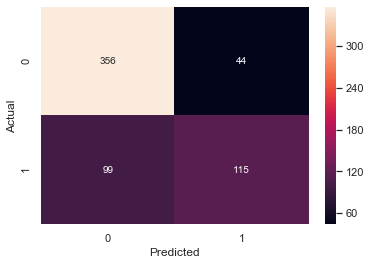

In [29]:
cm_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [30]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       400
           1       0.72      0.54      0.62       214

    accuracy                           0.77       614
   macro avg       0.75      0.71      0.72       614
weighted avg       0.76      0.77      0.76       614



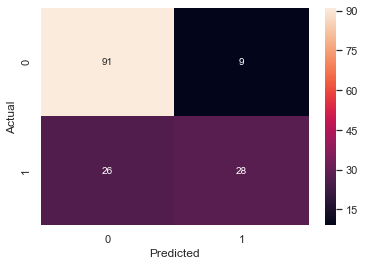

In [31]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

### Classification Report

In [32]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



### ROC AUC Score

In [33]:
roc_auc_score(y_train, prob_train_pred[:,1])

0.8365654205607477

In [34]:
roc_auc_score(y_test, prob_test_pred[:,1])

0.8631481481481481

### ROC Curve

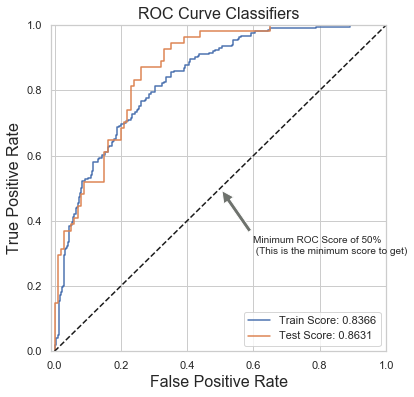

In [35]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()


### Precision-Recall curve

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.77')

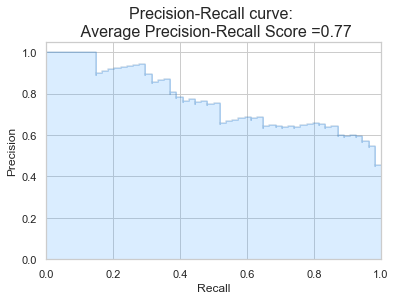

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_test_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

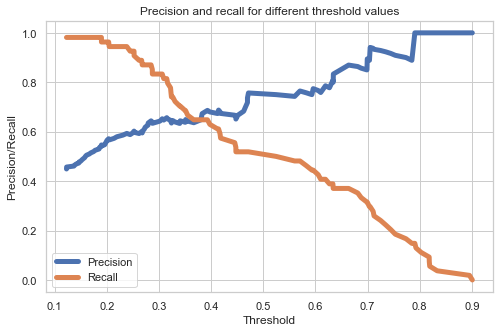

In [37]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.70')

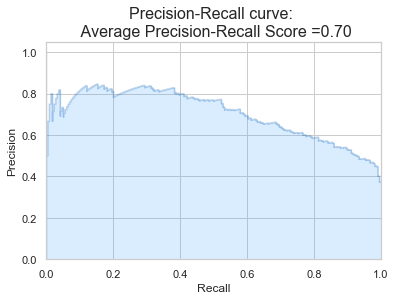

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_train_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

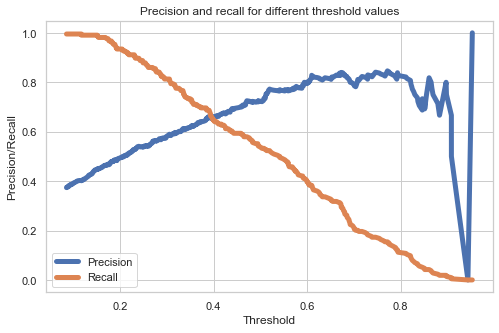

In [39]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

### Summary

In [40]:
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)

    print('-----------------------------------------------------------')
    print('Train set')
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, prob_train_pred[:,1]))
    cm_df = pd.DataFrame(confusion_matrix(y_train,y_train_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_train, y_train_pred))
    
    print('-----------------------------------------------------------')
    print('Test set')
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, prob_test_pred[:,1]))
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_test, y_test_pred))
    

In [41]:
ModelEvaluation(model,X_train,y_train,X_test,y_test,'DT')

Model Evaluation of DT
-----------------------------------------------------------
Train set
Accuracy:  0.7671009771986971
ROC AUC Score:  0.8365654205607477
Confusion matrix
True         0    1
Predicted          
0          356   44
1           99  115
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       400
           1       0.72      0.54      0.62       214

    accuracy                           0.77       614
   macro avg       0.75      0.71      0.72       614
weighted avg       0.76      0.77      0.76       614

-----------------------------------------------------------
Test set
Accuracy:  0.7727272727272727
ROC AUC Score:  0.8631481481481481
Confusion matrix
True        0   1
Predicted        
0          91   9
1          26  28
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                   

## 4.3. Train and perform cross validation

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

kfold = KFold(n_splits = 10, random_state = 10)
scores = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
scores

array([0.75806452, 0.79032258, 0.70967742, 0.77419355, 0.68852459,
       0.80327869, 0.7704918 , 0.81967213, 0.80327869, 0.7704918 ])

In [20]:
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 76.88% (+/- 7.88%)


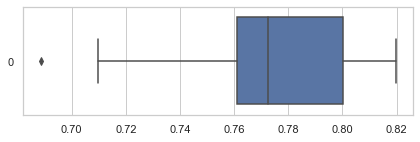

In [22]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

# Tuning hyper-parameters

In [32]:
# Specify parameters
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid_search = GridSearchCV(LogisticRegression(), params, cv = 10)
grid_search.fit(X_train, y_train)

# tree best estimator
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
model = best_model

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
prob_train_pred = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
prob_test_pred = model.predict_proba(X_test)

In [38]:
ModelEvaluation(model,X_train,y_train,X_test,y_test,'DT')

Model Evaluation of DT
-----------------------------------------------------------
Train set
Accuracy:  0.7671009771986971
ROC AUC Score:  0.8365654205607477
Confusion matrix
True         0    1
Predicted          
0          356   44
1           99  115
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       400
           1       0.72      0.54      0.62       214

    accuracy                           0.77       614
   macro avg       0.75      0.71      0.72       614
weighted avg       0.76      0.77      0.76       614

-----------------------------------------------------------
Test set
Accuracy:  0.7727272727272727
ROC AUC Score:  0.8631481481481481
Confusion matrix
True        0   1
Predicted        
0          91   9
1          26  28
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                   

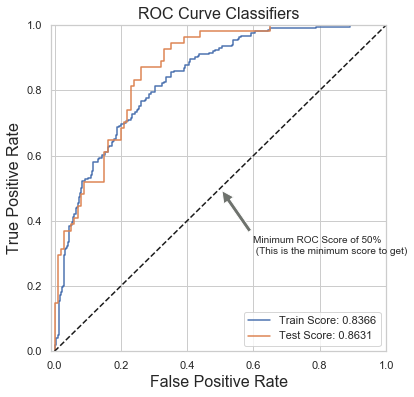

In [39]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()
